In [10]:
# Required Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
data = pd.read_csv("World_Marriage_Cleaned_Dataset.csv")

In [12]:
# Verify and correct column names if needed
data.columns = data.columns.str.strip()  # Remove any leading/trailing whitespace

In [13]:
if 'Count' not in data.columns:
    data['Count'] = 1

In [14]:
# Select relevant columns (Assuming you have 'Country', 'Age Group', 'Marital Status' and 'Count')
df = data[['Country', 'Age Group', 'Marital Status', 'Count']]

# Pivot data to have Age Group as columns for clustering
pivot_df = df.pivot_table(index='Country', columns='Age Group', values='Count', fill_value=0).reset_index()

# Drop the country column for clustering
X = pivot_df.drop('Country', axis=1)

# Standardize the data for better DBSCAN performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [15]:
# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust eps and min_samples based on the data
dbscan_labels = dbscan.fit_predict(X_scaled)

# Add the DBSCAN cluster labels to the original dataframe
pivot_df['Cluster'] = dbscan_labels

Average Silhouette Score for DBSCAN: 0.32677868141256244


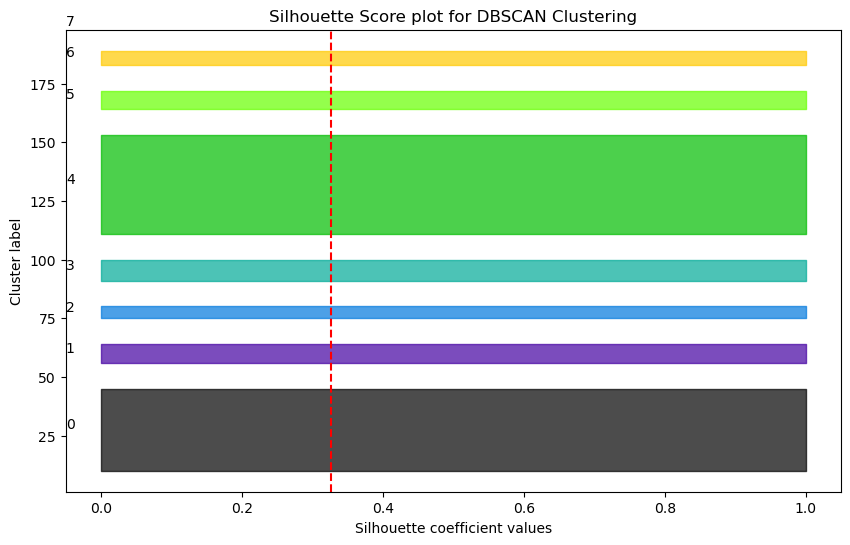

In [18]:
# Step 4: Use Silhouette Score to evaluate clustering quality
if len(set(dbscan.labels_)) > 1:  # Check if we have more than 1 cluster
    silhouette_avg = silhouette_score(X_scaled, dbscan.labels_)
    print(f"Average Silhouette Score for DBSCAN: {silhouette_avg}")
    
    # Silhouette samples for each point
    sample_silhouette_values = silhouette_samples(X_scaled, dbscan.labels_)
    
    # Plot Silhouette scores
    plt.figure(figsize=(10, 6))
    y_lower = 10
    for i in range(len(set(dbscan.labels_))):
        ith_cluster_silhouette_values = sample_silhouette_values[dbscan.labels_ == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        color = plt.cm.nipy_spectral(float(i) / len(set(dbscan.labels_)))
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    plt.title("Silhouette Score plot for DBSCAN Clustering")
    plt.xlabel("Silhouette coefficient values")
    plt.ylabel("Cluster label")
    plt.show()

else:
    print("DBSCAN resulted in 1 or fewer clusters, silhouette score is not applicable.")

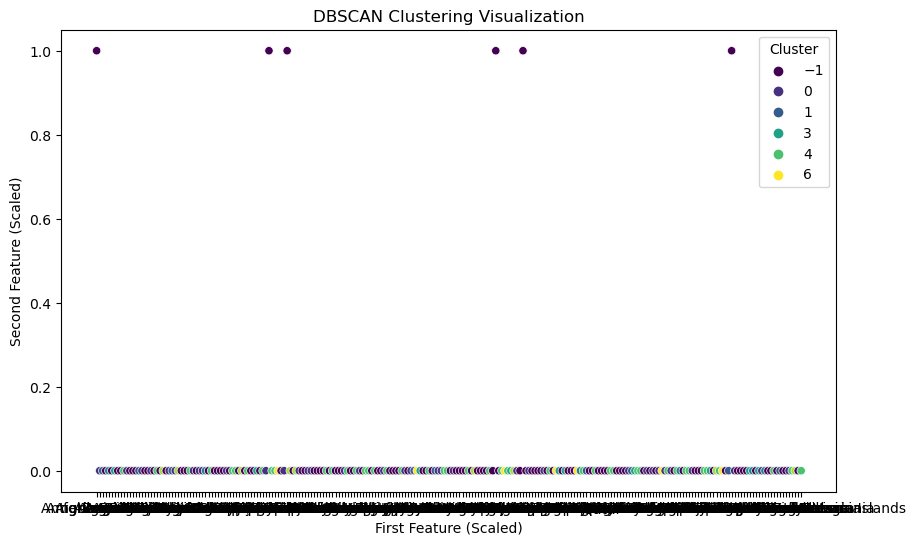

In [20]:
# Step 5: Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pivot_df.iloc[:, 0], y=pivot_df.iloc[:, 1], hue=pivot_df['Cluster'], palette="viridis")
plt.title("DBSCAN Clustering Visualization")
plt.xlabel('First Feature (Scaled)')
plt.ylabel('Second Feature (Scaled)')
plt.show()